# Gusethous booking A/B test 

This is a project to measure the online guesthouse booking experience


as follows: a guest finds an available room (listing) that she likes, and she then contacts the host. There are three ways to send an inquiry 
­ a contact
­a booking request, or 
­instant book ­ 

detailed at the bottom of this document. Upon receiving the inquiry, the host can then decide whether or not to say yes to the request (accept the request). However, the host may not accept a guest for many reasons. Some might be logistical, e.g. dates do not work in the calendar, and some may be more personal, e.g. the guest seems risky. Our goal is to help our guests maximize their likelihood of being accepted by the hosts they contact. 


Suppose we run an experiment where we require the guest to write a message that is at least 140 characters long to explain why he or she is interested in staying with the host, and we run this as a 50­50 experiment (50% in treatment, 50% in control). We then look at data on the contacts and bookings of users in the treatment group compared to the control group. We are interested in what happens to the experience of contacting and booking a place on Airbnb when the guest is required to write a message like this. We are also looking for suggestions for evaluating the future of this change. Should we launch the experiment to everyone or stop it? How would you explain the results and the decision to someone who was not highly technical? 
Using the (fabricated) experiment assignment and the contact and booking data attached, please provide analysis + write­up to answer these questions. 


## data provided 

Assignments ­ contains a row for every time that a user gets assigned to an treatment group. 
* id_user ­ random id of the user.  
  
* ab ­ The experimental group the user is assigned to. 

Contacts ­ contains a row for every time that a user makes an inquiry * id_guest ­ random id of the guest (user) making the inquiry. Can be linked to id_user. 


id_host ­ random id of the host (user) of the listing to which the inquiry is made. 


 id_listing ­ random id of the listing to which the inquiry is made. * 
 
ts_interaction_first ­ UTC timestamp of the moment the inquiry is made. 
 
ts_reply_at_first ­ UTC timestamp of the moment the host replies to the inquiry, if so. If missing, there is no reply. 

ts_accepted_at_first ­ UTC timestamp of the moment the host accepts the inquiry, if so. If missing, there is no acceptance. 

ts_booking_at ­ UTC timestamp of the moment the booking is made, if so. If missing, there is no booking. 

dim_contact_channel_first ­ The contact channel through which the inquiry was made. One of {contact_me, book_it, instant_book}. *


m_first_message_length ­ length of the message the guest sent the host, in characters. If missing then there was no message. 

## Some things to keep in mind: 

There are three ways to book a place: 

1. contact_me ­ The guests writes a message to the host to inquire about the listing. The host has the option to pre­approve the guest to book their place, or they can reject, or they can write a free text message with no explicit acceptance or rejection. If the host pre­approves, the guest can then go ahead and click to make the booking.


2. book_it ­ The guest puts money down to book the place directly, but the host has to accept the reservation request. If the host accepts, the booking happens automatically. 


3. instant_book ­ The guest books the listing directly, without any need for the host to accept or reject actively (it is an auto­accept by the host). 


# Part1: loading and observing data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("/Users/dx/Desktop/Linkedin_project/AB_test_project/takehome_contacts.csv")
df.count()

id_guest                  10000
id_host                   10000
id_listing                10000
ts_interaction_first      10000
ts_reply_at_first          8571
ts_accepted_at_first       3363
ts_booking_at              2171
dim_contact_channel       10000
m_first_message_length     9883
dtype: int64

In [2]:
ab_test = pd.read_csv("/Users/dx/Desktop/Linkedin_project/AB_test_project/takehome_assignments.csv")
ab_test.count()

id_user    10000
ab         10000
dtype: int64

we should drop duplicates of the ab test data

In [3]:
ab_test = ab_test.drop_duplicates()
ab_test.count()

id_user    9487
ab         9487
dtype: int64

In [4]:
df = df.join(ab_test.set_index('id_user'), on = 'id_guest')
df.count()

id_guest                  10896
id_host                   10896
id_listing                10896
ts_interaction_first      10896
ts_reply_at_first          9301
ts_accepted_at_first       3570
ts_booking_at              2265
dim_contact_channel       10896
m_first_message_length    10774
ab                        10896
dtype: int64

Looks liker we still got some problems, we need to find them

In [5]:
import matplotlib.pyplot as plt
df.m_first_message_length.hist()
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
df.describe

<bound method DataFrame.describe of                                   id_guest  \
0     f966752c-8533-48b2-af6f-8c6797d2b247   
1     873f93fb-234c-4cfb-83c7-27ff0e582a8e   
2     7308791e-04c3-416a-be2d-4188816decc2   
3     097c48a4-f4b6-4870-bf29-370e33de868e   
4     6ff7a902-541b-4eee-ace4-673262b95a94   
4     6ff7a902-541b-4eee-ace4-673262b95a94   
5     ff3d6a6a-7748-41f8-8a3f-fdc26ca21650   
6     29aa3e61-fefe-476b-a3c2-13c73bdabcc9   
7     c494e78e-7466-47ef-b5ba-c630f1a7f39c   
8     43b3e096-66d3-4d44-a1f7-116452df35fd   
9     c24131a1-10bc-4d16-9425-4390ff2fe74c   
10    7bd7d2b5-040c-4a72-8bba-7bd8da14cb7f   
11    ef804f0b-21a7-46d0-ae91-da812a72f763   
11    ef804f0b-21a7-46d0-ae91-da812a72f763   
12    9e4e506e-29c8-421b-acac-ca6ee984e9a2   
13    ae47170c-b631-46bb-b8d5-37c1f2797de1   
14    85fb715e-fc0f-49ac-832d-b20015cbbea4   
15    75b02483-b183-401b-91a5-a9bd3339e607   
16    b27d82bb-f8f6-4da3-bcd0-b206574ab78d   
17    ee0a90f6-e3f5-4b54-8c44-50dcded92f08  

now the data cleaning is complete, next we gonna observe the data and try to get some conclusion

# Part2: data observition

Experiment group
dim_contact_channel
Experiment group  dim_contact_channel
control           contact_me             4488
                  book_it                 936
                  instant_booked           22
treatment         contact_me             4482
                  book_it                 946
                  instant_booked           22
Name: dim_contact_channel, dtype: int64


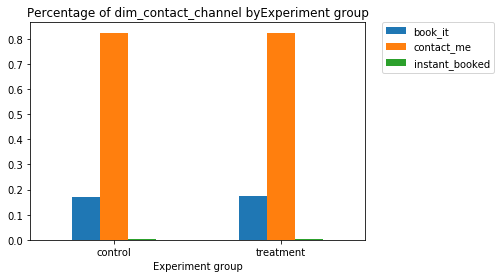

In [7]:
df['Experiment group']=df.ab

grp_col='Experiment group'
col='dim_contact_channel'
print grp_col
print col
grouped_contracts=df.groupby([grp_col])
print grouped_contracts[col].value_counts()


#use picture to plot them
grouped_contracts[col].value_counts(2).unstack().plot(kind="bar",rot='horizontal',\
                                    title='Percentage of ' + col + ' by' + grp_col )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


As we can see, the majority of booking is through contact_me, instant_booked is nearly neglible, beside, there are no distinctive difference between test and control team.

### next, we are gonna to define some binary outcomes then check them between treatment and control group

In [8]:
from scipy.stats import chi2_contingency #import the chi-square test model

df.count()

id_guest                  10896
id_host                   10896
id_listing                10896
ts_interaction_first      10896
ts_reply_at_first          9301
ts_accepted_at_first       3570
ts_booking_at              2265
dim_contact_channel       10896
m_first_message_length    10774
ab                        10896
Experiment group          10896
dtype: int64

In [37]:
df['replied'] = df.ts_reply_at_first.notnull()

df['accepted'] = df.ts_accepted_at_first.notnull()

df['booked'] = df.ts_booking_at.notnull()

df['messaged'] = df.m_first_message_length.apply(lambda x: 'messaged' if x>0.0 else 'no message')

df['message_group'] = df.m_first_message_length.apply(lambda x: 'long message' if x> 140 else 'short message')

binary_outcome = ['replied', 'accepted', 'booked', 'messaged', 'message_group', 'dim_contact_channel']

# Part3: data testing

## then we are gonna compute the chi-square test

In [10]:
from scipy import stats

for i in binary_outcome:
    print "Chi-square test of control group: " + i + " Vs treatment group"
    print grouped_contracts[i].value_counts(2).unstack().fillna(0)
    print grouped_contracts[i].value_counts().unstack().fillna(0)
    print stats.chi2_contingency(grouped_contracts[i].value_counts().unstack().fillna(0))
    print "\n"

Chi-square test of control group: replied Vs treatment group
replied              False     True 
Experiment group                    
control           0.148733  0.851267
treatment         0.144037  0.855963
replied           False  True 
Experiment group              
control             810   4636
treatment           785   4665
(0.44395216930662335, 0.5052210539571169, 1, array([[ 797.20723201, 4648.79276799],
       [ 797.79276799, 4652.20723201]]))


Chi-square test of control group: accepted Vs treatment group
accepted             False     True 
Experiment group                    
control           0.669115  0.330885
treatment         0.675596  0.324404
accepted          False  True 
Experiment group              
control            3644   1802
treatment          3682   1768
(0.49044234098998396, 0.4837300526070778, 1, array([[3661.65528634, 1784.34471366],
       [3664.34471366, 1785.65528634]]))


Chi-square test of control group: booked Vs treatment group
booked             

we can plot them out, the result would be more obvious

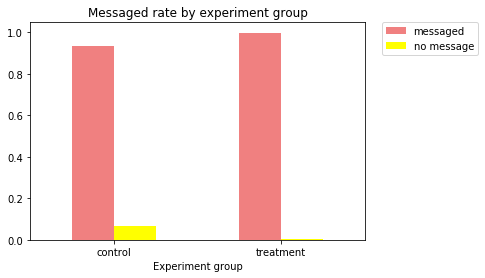

In [11]:
grouped_contracts['messaged'].value_counts(2).unstack().fillna(0).plot(kind="bar",color=['lightcoral','yellow'],rot='horizontal',\
                                    title='Messaged rate by experiment group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

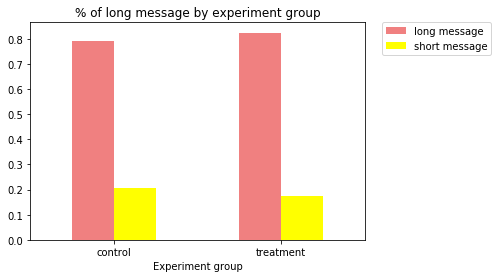

In [12]:
grouped_contracts['message_group'].value_counts(2).unstack().fillna(0).plot(kind="bar",color=['lightcoral','yellow'],rot='horizontal',\
                                    title='% of long message by experiment group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

## Define continuous outcomes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d517250>,
      dtype=object)

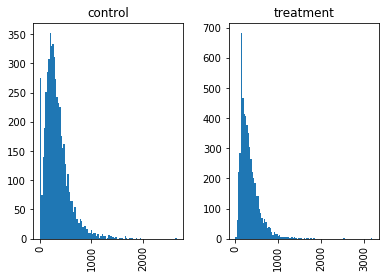

In [13]:
df.m_first_message_length.hist(bins = 100, by = df.ab)

from the plot we can see that the test make people to make more long message

## Do t-test for continous variable

In [14]:
import datetime
df['ts_reply_at_first'] = df.ts_reply_at_first.apply(lambda x: pd.Timestamp(x))
df['ts_interaction_first'] = df.ts_interaction_first.apply(lambda x: pd.Timestamp(x))
df['ts_accepted_at_first']= df.ts_accepted_at_first.apply(lambda x: pd.Timestamp(x))
df['ts_booking_at']= df.ts_booking_at.apply(lambda x: pd.Timestamp(x))


#df['reply_time']=(df.ts_reply_at_first- df.ts_interaction_first)
df['reply_time_h']=(df.ts_reply_at_first-df.ts_interaction_first)/np.timedelta64(1, 'h')
df['accept_time_h']=(df.ts_accepted_at_first-df.ts_interaction_first)/np.timedelta64(1, 'h')
df['booking_time_h']=(df.ts_booking_at-df.ts_interaction_first)/np.timedelta64(1, 'h')

In [15]:
df[['reply_time_h','accept_time_h','booking_time_h','m_first_message_length']].describe()

,reply_time_h,accept_time_h,booking_time_h,m_first_message_length
count,9301.000000,3570.000000,2265.000000,10774.000000
mean,48.745632,28.414022,45.376143,325.899759
std,407.023777,302.762954,382.221049,234.488860
min,-0.027778,-0.027778,-0.027778,0.000000
25%,0.557222,0.412222,0.788611,168.000000
50%,3.921667,2.939861,6.309722,273.000000
75%,16.716389,14.423750,24.501111,421.000000
max,14026.655556,16102.172500,16102.172500,3182.000000


next, we are gonna dig deeper

In [16]:
print df.reply_time_h[df.reply_time_h<0].count()
print df.accept_time_h[df.accept_time_h<0].count()
print df.booking_time_h[df.booking_time_h<0].count()

164
115
92


Because they are really low compare to the total amount of data, so we can use 0 instead of it

In [17]:
df.reply_time_h = df.reply_time_h.apply(lambda x: 0 if x<0 else x)
df.accept_time_h = df.accept_time_h.apply(lambda x: 0 if x<0 else x)
df.booking_time_h = df.booking_time_h.apply(lambda x: 0 if x<0 else x)

Then we will check the extremely large 

In [18]:
print df.reply_time_h[df.reply_time_h>168].count()
print df.accept_time_h[df.accept_time_h>168].count()
print df.booking_time_h[df.booking_time_h>168].count()

335
71
94


In [19]:
grouped_contracts.describe()

accept_time_h                                        \
                         count       mean         std  min       25%   
Experiment group                                                       
control                 1802.0  36.507808  415.880079  0.0  0.395139   
treatment               1768.0  20.165879   93.420169  0.0  0.435208   

                                                    booking_time_h             \
                       50%        75%           max          count       mean   
Experiment group                                                                
control           2.815417  15.193542  16102.172500         1133.0  55.272152   
treatment         3.047917  14.091458   2542.484167         1132.0  35.473247   

                      ...      m_first_message_length         reply_time_h  \
                      ...                         75%     max        count   
Experiment group      ...                                                    
control               ...                       424.0  2654.0       4636.0   
treatment             ...                       417.0  3182.0       4665.0   

                                                                             \
                       mean         std  min       25%       50%        75%   
Experiment group                                                              
control           47.984875  402.982305  0.0  0.557986  3.913056  16.660694   
treatment         49.502275  411.042491  0.0  0.551667  3.956667  16.729444   

                                
                           max  
Experiment group                
control           13411.246944  
treatment         14026.655556  

[2 rows x 32 columns]

In [36]:
df.m_first_message_length.dropna()

from scipy.stats import ttest_ind
np.random.seed(12345678)

t, p = ttest_ind(df.m_first_message_length[df.ab=="treatment"], \
df.m_first_message_length[df.ab=="control"], equal_var=False,nan_policy="omit")
print "t-test for m_first_message_length between treatment and control group: t = %g  p = %g" % (t, p)



t-test for m_first_message_length between treatment and control group: t = -0.0452642  p = 0.963898


# no significant difference of average message length in the two groups at 95% confidence level.

In [44]:
print df[df.ab.notnull()].message_group.value_counts()
print df[df.ab.isnull()].message_group.value_counts()
#although there are some records with missing value for treatment and control, those records can still be used in testing
#the impact of long message(>140) Vs not.

long message     8810
short message    2086
Name: message_group, dtype: int64
Series([], Name: message_group, dtype: int64)


## Although in the homework description it says: We "required" the guest to write a message that's at least 140 characters long. But I still see lots of m_first_message_length value less than 140 in the treatment group. So I think the experiment is conducted in a way that only "ask" but not "force" user to submit a message that's more than 140 characters long. Even the first message is less than 140 characters, the user still can submit the inqury.Therefore, it might worth to check the acceptance rate, response rate, booking rate for those people who send long message (if we define long message as more than 140 characters)no matter which group those users belong to. I only use those contact_me records since most of the users do not send long message when they use book it or instant book.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11652ed50>,
      dtype=object)

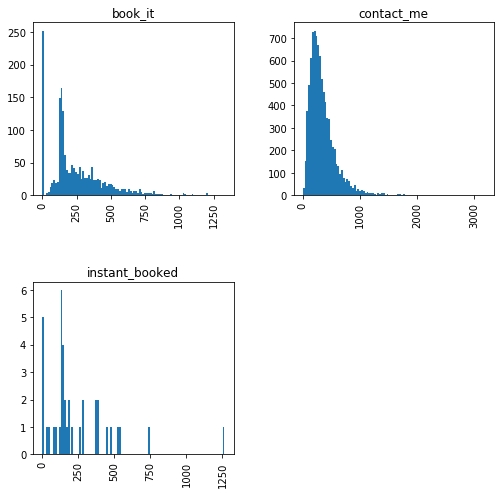

In [46]:
df.m_first_message_length.hist(bins=100, by=df.dim_contact_channel,figsize=(8,8))
#so basically this test only impact those people who book through "contact me" or "book_it"

In [47]:
grouped_by_long_message=df[df.dim_contact_channel=='contact_me'].groupby(['message_group'])
binary_outcome=['replied','accepted','booked']
for i in binary_outcome:
    print "Chi-square test of contingency table: " + i + " Vs message group"
    print grouped_by_long_message[i].value_counts(2).unstack().fillna(0)
    print stats.chi2_contingency(grouped_by_long_message[i].value_counts().unstack().fillna(0))
    print "\n"

Chi-square test of contingency table: replied Vs message group
replied           False     True 
message_group                    
long message   0.158724  0.841276
short message  0.157364  0.842636
(0.0068099855080616814, 0.9342311185286858, 1, array([[1217.49832776, 6462.50167224],
       [ 204.50167224, 1085.49832776]]))


Chi-square test of contingency table: accepted Vs message group
accepted          False     True 
message_group                    
long message   0.723568  0.276432
short message  0.733333  0.266667
(0.48043272430723394, 0.488226375659801, 1, array([[5567.78595318, 2112.21404682],
       [ 935.21404682,  354.78595318]]))


Chi-square test of contingency table: booked Vs message group
booked            False     True 
message_group                    
long message   0.867708  0.132292
short message  0.878295  0.121705
(0.997792268629769, 0.3178453045659588, 1, array([[6675.69230769, 1004.30769231],
       [1121.30769231,  168.69230769]]))




## No significant difference in reply rate, acceptance rate, booking rate between different message group.

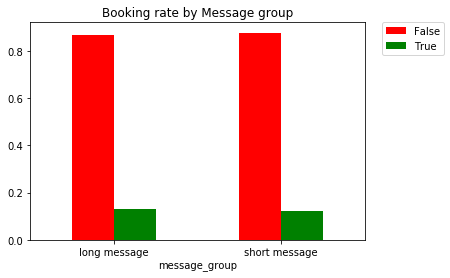

In [49]:
grouped_by_long_message['booked'].value_counts(2).unstack().fillna(0).plot(kind="bar",color=['r','g'],rot='horizontal',\
                                    title='Booking rate by Message group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

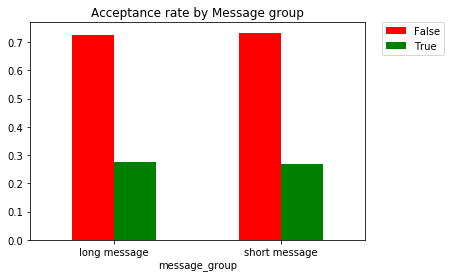

In [50]:
grouped_by_long_message['accepted'].value_counts(2).unstack().fillna(0).plot(kind="bar",color=['r','g'],rot='horizontal',\
                                    title='Acceptance rate by Message group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [51]:
grouped_by_long_message.describe()

accept_time_h                                                  \
                      count       mean         std  min       25%       50%   
message_group                                                                 
long message         2123.0  40.357417  388.037741  0.0  0.622917  4.296667   
short message         344.0  14.413009   30.640603  0.0  0.514583  2.834722   

                                       booking_time_h             \
                     75%           max          count       mean   
message_group                                                      
long message   19.263472  16102.172500         1016.0  85.116850   
short message  15.233333    281.364444          157.0  30.474519   

                   ...      m_first_message_length         reply_time_h  \
                   ...                         75%     max        count   
message_group      ...                                                    
long message       ...                       465.0  3182.0       6461.0   
short message      ...                       123.0   140.0       1087.0   

                                                                         \
                    mean         std  min      25%       50%        75%   
message_group                                                             
long message   51.734619  380.519968  0.0  0.69250  4.624722  19.093889   
short message  47.772336  326.501315  0.0  0.40625  3.035556  18.006806   

                             
                        max  
message_group                
long message   13411.246944  
short message   8109.244444  

[2 rows x 32 columns]

## When user choose contact_me, long message does not make host reply faster and does not increase acceptance rate and booking rate.

In [52]:
grouped_by_long_message=df[df.dim_contact_channel=='book_it'].groupby(['message_group'])
binary_outcome=['replied','accepted','booked']
for i in binary_outcome:
    print "Chi-square test of contingency table: " + i + " Vs message group"
    print grouped_by_long_message[i].value_counts(2).unstack().fillna(0)
    print stats.chi2_contingency(grouped_by_long_message[i].value_counts().unstack().fillna(0))
    print "\n"

Chi-square test of contingency table: replied Vs message group
replied           False     True 
message_group                    
long message   0.087466  0.912534
short message  0.098318  0.901682
(0.5192072397853715, 0.4711800469496896, 1, array([[ 101.94314559, 1007.05685441],
       [  71.05685441,  701.94314559]]))


Chi-square test of contingency table: accepted Vs message group
accepted          False     True 
message_group                    
long message   0.458972  0.541028
short message  0.406210  0.593790
(4.9411056985081165, 0.026225255098907628, 1, array([[484.96652497, 624.03347503],
       [338.03347503, 434.96652497]]))


Chi-square test of contingency table: booked Vs message group
booked            False     True 
message_group                    
long message   0.464382  0.535618
short message  0.412678  0.587322
(4.727378845102738, 0.029686092778746474, 1, array([[491.44845909, 617.55154091],
       [342.55154091, 430.44845909]]))




so people who use instant_booked or book_it tends to have a much  lower chance to send long message

dim_contact_channel  message_group
book_it              long message     1109
                     short message     773
contact_me           long message     7680
                     short message    1290
instant_booked       short message      23
                     long message       21
Name: message_group, dtype: int64
dim_contact_channel  message_group
book_it              long message     0.589267
                     short message    0.410733
contact_me           long message     0.856187
                     short message    0.143813
instant_booked       short message    0.522727
                     long message     0.477273
Name: message_group, dtype: float64


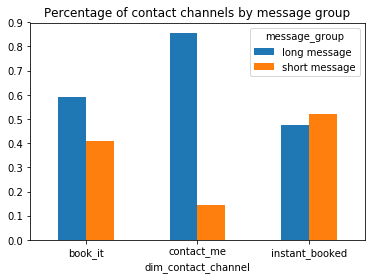

In [53]:
b=df.groupby(['dim_contact_channel'])
print b.message_group.value_counts()
print b.message_group.value_counts(2)
b.message_group.value_counts(2).unstack().plot(kind="bar",rot='horizontal',\
                                    title='Percentage of contact channels by message group')

# Conclusion

## A)  no significant difference of average message length in the two groups at 95% confidence level.

## B)  When user choose contact_me, long message does not make host reply faster and does not increase acceptance rate and booking rate.

## C) No significant difference in reply rate, acceptance rate, booking rate between different message group.

### Thanks for watching!